In [5]:
# %load wrangling-with-pandas.py
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

pd.__version__

# Taking a look at the Movies dataset
# This data shows the movies based on their title and the year of release

movies = pd.read_csv('data/titles.csv')
movies.info()

movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


In [6]:

# Taking a look at the Cast dataset
# This data shows the cast (actors, actresses, supporting roles) for each movie
#
# The attribute n basically tells the importance of the cast role, lower the number, more important the role.
# Supporting cast usually don't have any value for n
cast = pd.read_csv('data/cast.csv')
cast.info()
cast.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [11]:
# Taking a look at the Release dataset
# This data shows details of when each movie was release in each country with the release date
release_dates = pd.read_csv('data/release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()
release_dates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [8]:
# Section I - Basic Querying, Filtering and Transformations
# What is the total number of movies?
len(movies)

244914

In [9]:
# List all Batman movies ever made
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


In [10]:
# List all Batman movies ever made - the right approach
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


In [12]:
# Display the top 15 Batman movies in the order they were released
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


In [13]:
# Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest
hpdf = movies[movies.title.str.contains('Harry Potter', case=False)]
print('All Harry Potter Movies:', len(hpdf))
print(hpdf.head())

All Harry Potter Movies: 8
                                               title  year
50581      Harry Potter and the Order of the Phoenix  2007
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
109213        Harry Potter and the Half-Blood Prince  2009
143147  Harry Potter and the Deathly Hallows: Part 2  2011


In [14]:
# How many movies were made in the year 2017?
print(len(movies[movies.year == 2017]))

11474


In [15]:
# Section I - Q2 : How many movies were made in the year 2015?
print(len(movies[movies.year == 2015]))

8702


In [16]:
# Section I - Q3 : How many movies were made from 2000 till 2018?
print(len(movies[(movies.year >= 2000) & (movies.year <= 2018)]))

114070


In [17]:
# Section I - Q4: How many movies are titled "Hamlet"?
hamletMovies = movies[movies.title == 'Hamlet']
print(len(hamletMovies))

20


In [18]:

# Section I - Q5: List all movies titled "Hamlet"
# The movies should only have been released on or after the year 2000
# Display the movies based on the year they were released (earliest to most recent)
print(hamletMovies[hamletMovies.year >= 2000].sort_values(by=['year'], ascending=True))

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


In [19]:
# Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
# supporting cast are NOT ranked by an "n" value (NaN)
# check for how to filter based on nulls
# Option 1
supportCast = cast[(cast.title == 'Inception') & (pd.isnull(cast.n))]
print(len(supportCast))

27


In [20]:

# Option 2 - better
inceptionDf = cast[cast.title == 'Inception']
print(len(inceptionDf[inceptionDf.n.isnull()]))

27


In [21]:
# Section I - Q7: How many roles in the movie "Inception" are of the main cast
# main cast always have an 'n' value
# Option
#   mainCast = cast[(cast.title == 'Inception') & ~(pd.isnull(cast.n))]
#   len(mainCast)

print(len(inceptionDf[~inceptionDf.n.isnull()]))

51


In [22]:
# Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception"
# support cast always have an 'n' value
# remember to sort!
print(inceptionDf[inceptionDf.n < 11].sort_values(by='n', ascending=True))
# topCast = (cast[(cast.title == 'Inception') & ~(pd.isnull(cast.n))].sort_values(by='n', ascending=True)).iloc[:10]
# print(topCast)

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


In [23]:
# Section I - Q9:
# (A) List all movies where there was a character 'Albus Dumbledore'
dumbledoreDf = cast[cast.character.str.match('Albus Dumbledore')]
print(dumbledoreDf.title)
# (B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
# For Part (B) remember the same actor might play the same role in multiple movies
print(dumbledoreDf.name.unique)

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object
<bound method Series.unique of 704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object>


In [24]:
# Section I - Q10:
# (A) How many roles has 'Keanu Reeves' played throughout his career?
keanuReevesDf = cast[cast.name.str.match('Keanu Reeves')]
print(len(keanuReevesDf))
# (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
print(keanuReevesDf[keanuReevesDf.year >= 1999].sort_values(by='year', ascending=True))

62
                                  title  year          name   type  \
1892370                     Me and Will  1999  Keanu Reeves  actor   
1892369                     Me and Will  1999  Keanu Reeves  actor   
1892390                      The Matrix  1999  Keanu Reeves  actor   
1892387                        The Gift  2000  Keanu Reeves  actor   
1892398                     The Watcher  2000  Keanu Reeves  actor   
1892397                The Replacements  2000  Keanu Reeves  actor   
1892383                  Sweet November  2001  Keanu Reeves  actor   
1892358                       Hard Ball  2001  Keanu Reeves  actor   
1892391             The Matrix Reloaded  2003  Keanu Reeves  actor   
1892379          Something's Gotta Give  2003  Keanu Reeves  actor   
1892392          The Matrix Revolutions  2003  Keanu Reeves  actor   
1892351                    Ellie Parker  2005  Keanu Reeves  actor   
1892348                     Constantine  2005  Keanu Reeves  actor   
1892400          

In [25]:
# Section I - Q11:
# (A) List the total number of actor and actress roles available from 1950 - 1960
print(len(cast[(cast.year >= 1950) & (cast.year <= 1960)]))
print(len(cast[cast.year.between(1950, 1960)]))
# Group by
print(
    cast[cast.year.between(1950, 1960)][['type', 'name']].groupby('type').count().reset_index().rename({'name': 'freq'}, axis=1))

# (B) List the total number of actor and actress roles available from 2007 - 2017
print(len(cast[(cast.year >= 2007) & (cast.year <= 2017)]))
print(len(cast[cast.year.between(2007, 2017)]))
# Group by
print(
    cast[cast.year.between(2007, 2017)][['type', 'name']].groupby('type').count().reset_index().rename({'name': 'freq'}, axis=1))

234635
234635
      type    freq
0    actor  171302
1  actress   63333
1452413
1452413
      type    freq
0    actor  922782
1  actress  529631


In [26]:
# Section I - Q12:
# (A) List the total number of leading roles available from 2000 to present
print(len(cast[(cast.year >= 2000) & (cast.n == 1)]))
# (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)
print(len(cast[(cast.n.notnull()) & (cast.year >= 2000) & (cast.n > 2)]))
# (C) List the total number of support\extra-credit roles available from 2000 - present
print(len(cast[(cast.year > 2000) & (cast.n != 1)]))

60568
944946
1839950


title            year
$pent            2000    1
Preston Tylk     2000    1
Poteryannyy ray  2000    1
dtype: int64


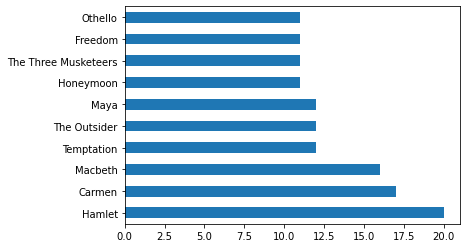

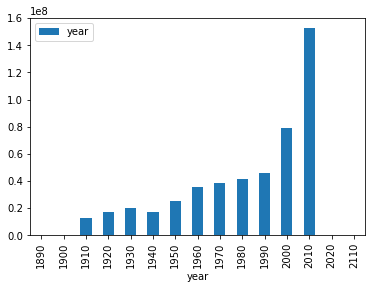

In [27]:

##################################################################################

# Section II - Aggregations, Transformations and Visualizations
# What are the top ten most common movie names of all time?
topTenCommonMovieNamesDf = movies.title.value_counts()[:10]

# Plot the top ten common movie names of all time
topTenCommonMovieNamesDf.plot(kind='barh')

# Section II - Q1: Which years in the 2000s saw the most movies released? (Show top 3)
top3=movies[movies.year == 2000].value_counts()[:3]
print(top3)

# Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
# Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
# You might need to sort before plotting

moviesByDecadeDf = movies.groupby(movies.year//10 * 10).sum()
moviesByDecadeDf.plot(kind = "bar");


In [28]:

# Section II - Q3:
# (A) What are the top 10 most common character names in movie history?
cast.character.value_counts()[:10]

# (B) Who are the top 10 people most often credited as "Herself" in movie history?
cast[cast.character == 'Herself']['name'].value_counts()[:10]

# (C) Who are the top 10 people most often credited as "Himself" in movie history?
cast[cast.character == 'Himself']['name'].value_counts()[:10]


Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

In [29]:
# Section II - Q4:
# Hint: The startswith() function might be useful
# (A) What are the top 10 most frequent roles that start with the word "Zombie"?
cast[cast.character.str.startswith('Zombie')].character.value_counts().head(10)
# (B) What are the top 10 most frequent roles that start with the word "Police"?
cast[cast.character.str.startswith('Police')].character.value_counts().head(10)

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

year
1985    AxesSubplot(0.125,0.125;0.775x0.755)
1986    AxesSubplot(0.125,0.125;0.775x0.755)
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
1991    AxesSubplot(0.125,0.125;0.775x0.755)
1992    AxesSubplot(0.125,0.125;0.775x0.755)
1993    AxesSubplot(0.125,0.125;0.775x0.755)
1994    AxesSubplot(0.125,0.125;0.775x0.755)
1995    AxesSubplot(0.125,0.125;0.775x0.755)
1996    AxesSubplot(0.125,0.125;0.775x0.755)
1997    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013 

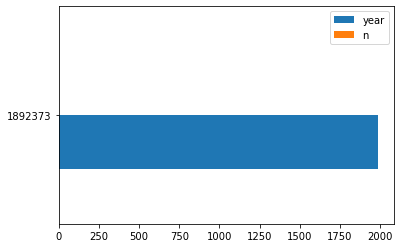

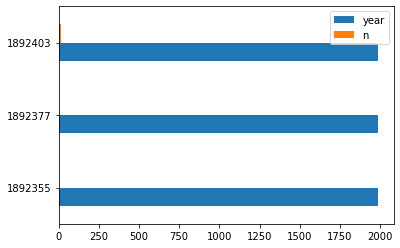

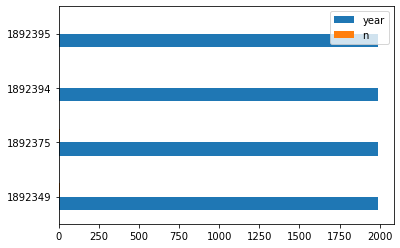

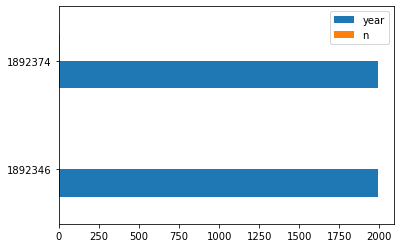

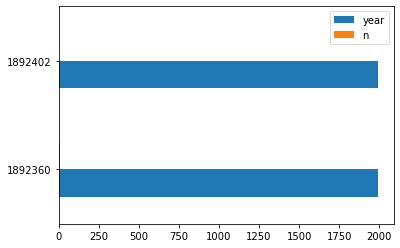

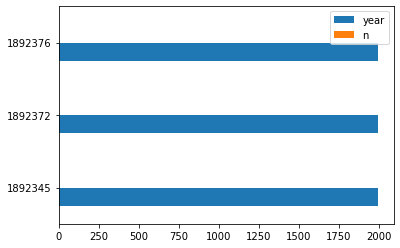

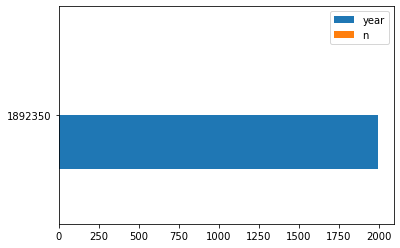

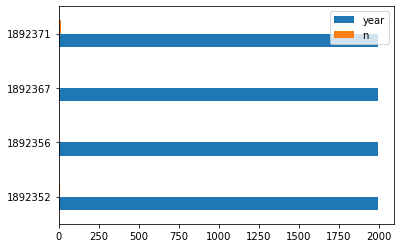

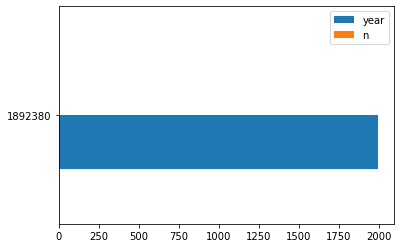

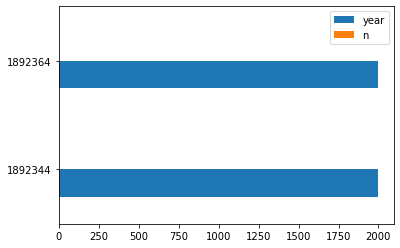

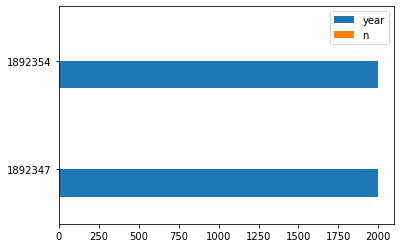

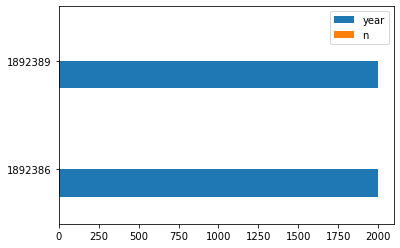

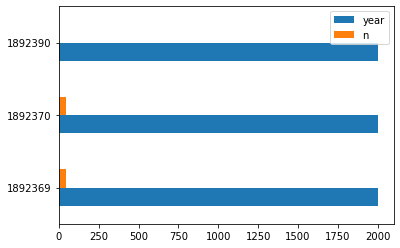

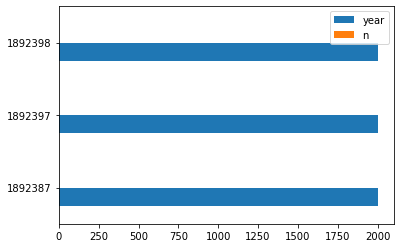

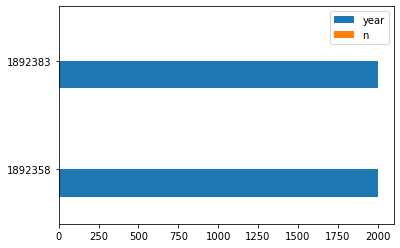

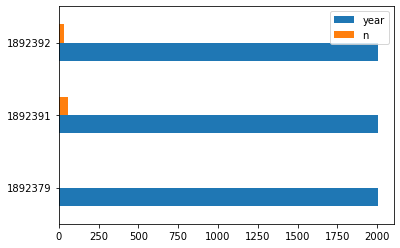

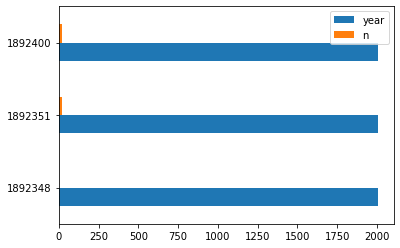

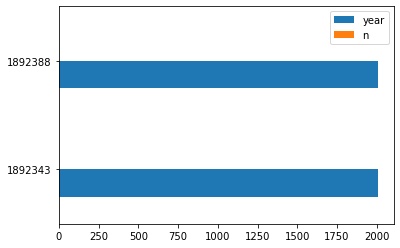

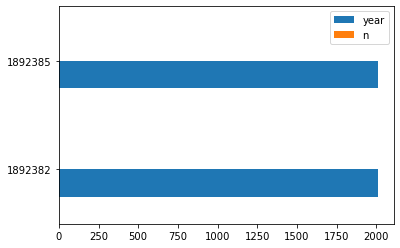

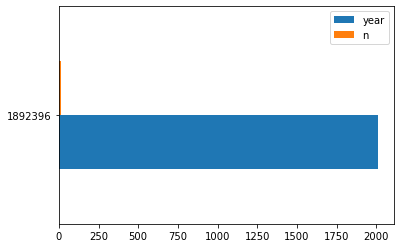

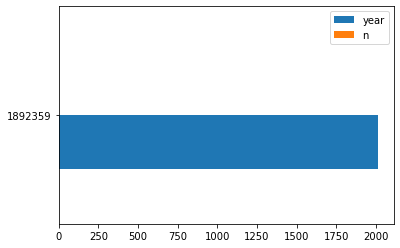

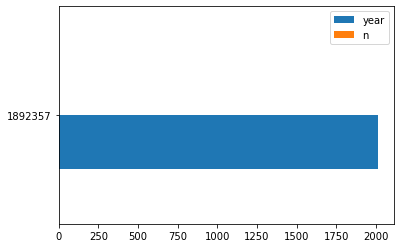

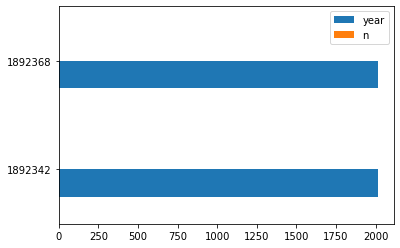

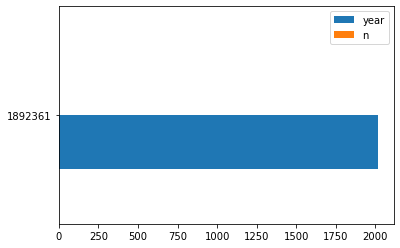

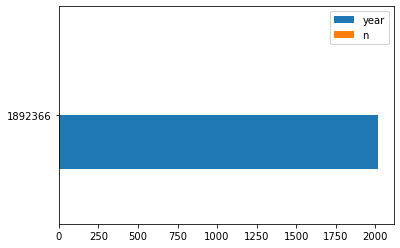

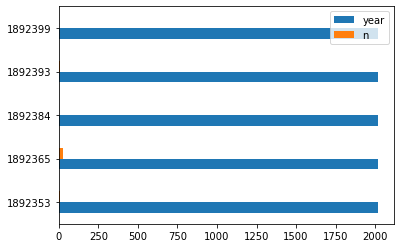

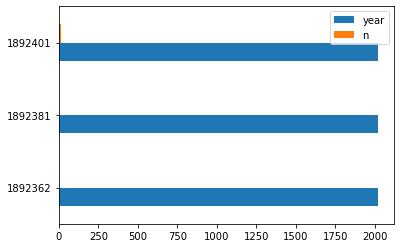

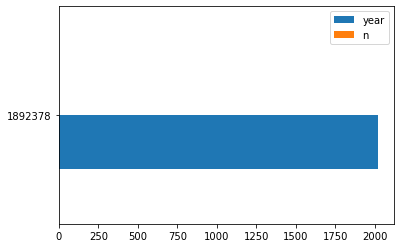

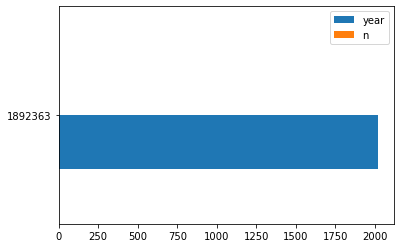

In [31]:
# Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.
keanu_movies = cast[cast.name == "Keanu Reeves"]
keanu_movies.groupby("year").plot(kind='barh')

<AxesSubplot:xlabel='year', ylabel='n'>

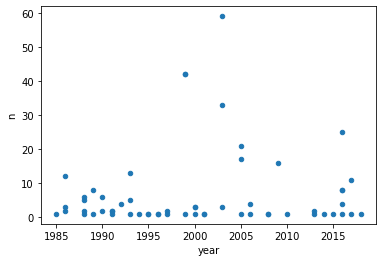

In [32]:
# Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.
# keanu_movies.groupby("year")["n"].count().plot(kind="bar", figsize = (10,5))
keanu = cast[(cast.name == 'Keanu Reeves') & (pd.notnull(cast.n))][['year', 'n']].sort_values('year')
keanu.plot(x='year', y='n', kind='scatter')


<AxesSubplot:xlabel='year'>

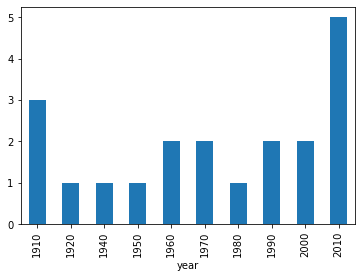

In [33]:

# Section II - Q7: Plot the number of "Hamlet" films made by each decade
hamlet = (movies[movies.title == 'Hamlet'].groupby(movies.year // 10 * 10).count().rename({'title': 'count'}, axis=1))['count']
hamlet.plot(kind='bar')


In [34]:

# Section II - Q8:
# Hint: A specific value of n might indicate a leading role
# (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?
print (cast[(cast.year.between(1960, 1969)) & (cast.n == 1)].groupby(['year', 'type']).count()[['title']].rename({'title': 'count'}, axis=1))
# (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
print (cast[(cast.year.between(2000, 2009)) & (cast.n == 1)].groupby(['year', 'type']).count()[['title']].rename({'title': 'count'}, axis=1))



              count
year type          
1960 actor      733
     actress    302
1961 actor      761
     actress    327
1962 actor      782
     actress    299
1963 actor      714
     actress    336
1964 actor      823
     actress    313
1965 actor      862
     actress    340
1966 actor      900
     actress    358
1967 actor      874
     actress    402
1968 actor      920
     actress    407
1969 actor      951
     actress    419
              count
year type          
2000 actor     1440
     actress    593
2001 actor     1462
     actress    633
2002 actor     1551
     actress    662
2003 actor     1540
     actress    662
2004 actor     1706
     actress    685
2005 actor     1836
     actress    787
2006 actor     2001
     actress    881
2007 actor     2145
     actress    819
2008 actor     2285
     actress    971
2009 actor     2591
     actress   1094


In [35]:
# Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role
frankOz = (cast[cast.name == 'Frank Oz'].groupby(['year', 'title']).count()[['name']].rename({'name': 'freq'}, axis=1)
         .sort_values(by=['year'], ascending=True))
print(frankOz[frankOz.freq > 1])


# Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice
frankOz = cast[cast.name == 'Frank Oz'].groupby(['character']).count()[['name']].rename({'name': 'freq'}, axis=1)
print(frankOz[frankOz.freq > 1])

                                           freq
year title                                     
1979 The Muppet Movie                         8
1981 An American Werewolf in London           2
     The Great Muppet Caper                   6
1982 The Dark Crystal                         2
1984 The Muppets Take Manhattan               7
1985 Follow That Bird                         3
1992 The Muppet Christmas Carol               7
1996 Muppet Treasure Island                   4
1999 Muppets from Space                       4
     The Adventures of Elmo in Grouchland     3
                freq
character           
Animal             6
Bert               3
Cookie Monster     5
Fozzie Bear        4
Grover             2
Miss Piggy         6
Sam the Eagle      5
Yoda               6


AxesSubplot(0.125,0.125;0.775x0.755)


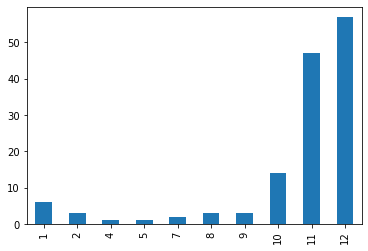

In [36]:
# Section III - Advanced Merging, Querying and Visualizations
# Make a bar plot with the following conditions
# Frequency of the number of movies with "Christmas" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by month
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
print(christmas.date.dt.month.value_counts().sort_index().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


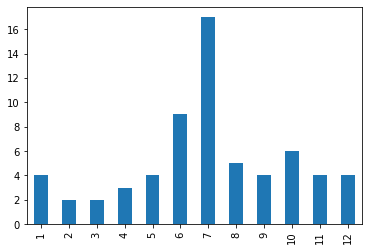

In [37]:

# Section III - Q1: Make a bar plot with the following conditions
# Frequency of the number of movies with "Summer" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by month
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
print(summer.date.dt.month.value_counts().sort_index().plot(kind='bar'))



AxesSubplot(0.125,0.125;0.775x0.755)


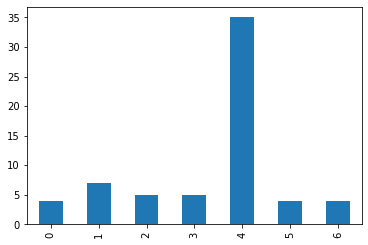

In [38]:
# Section III - Q2: Make a bar plot with the following conditions
# Frequency of the number of movies with "Action" in their title
# Movies should be such that they are released in the USA.
# Show the frequency plot by week
action = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
print(action.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar'))


In [39]:
# Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their release date in the USA sorted by the date of release
# Hint: You might need to join or merge two datasets!
keanu_movies = cast[cast.name == "Keanu Reeves"]
usa_release = release_dates[(release_dates.country == 'USA')]
merged_usa_keanu = keanu_movies.merge(usa_release, how = "left", on = ["title", "year"])
print(merged_usa_keanu[merged_usa_keanu.n == 1].sort_values(by = "date"))

                               title  year          name   type  \
52                  The Night Before  1988  Keanu Reeves  actor   
4   Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
3         Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
25                     Little Buddha  1993  Keanu Reeves  actor   
38                             Speed  1994  Keanu Reeves  actor   
22                   Johnny Mnemonic  1995  Keanu Reeves  actor   
2               A Walk in the Clouds  1995  Keanu Reeves  actor   
5                     Chain Reaction  1996  Keanu Reeves  actor   
12                 Feeling Minnesota  1996  Keanu Reeves  actor   
44              The Devil's Advocate  1997  Keanu Reeves  actor   
48                        The Matrix  1999  Keanu Reeves  actor   
55                  The Replacements  2000  Keanu Reeves  actor   
41                    Sweet November  2001  Keanu Reeves  actor   
16                         Hard Ball  2001  Keanu Reeves  acto

<AxesSubplot:>

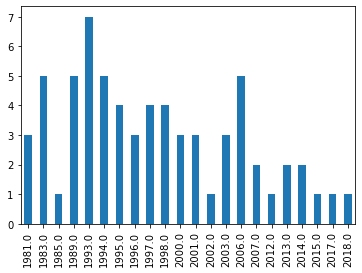

In [40]:
# Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?
merged_usa_keanu.date.dt.month.value_counts().sort_index().plot(kind='bar')

# Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?
ian_mckellen_movies = cast[cast.name == "Ian McKellen"]
merged_usa_ian_mckellen = ian_mckellen_movies.merge(usa_release, how = "left", on = ["title", "year"])
merged_usa_ian_mckellen.date.dt.year.value_counts().sort_index().plot(kind='bar')